In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import seaborn as sns
from glob import glob

In [2]:
def train_data(train_path):
   classes, class_paths = zip(*[(label, os.path.join(train_path, label, image))
                                 for label in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, label))
                                 for image in os.listdir(os.path.join(train_path, label))])

   train_dataset = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
   return train_dataset

In [3]:
def test_data(test_path):
   classes, class_paths = zip(*[(label, os.path.join(test_path, label, image))
                                 for label in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, label))
                                 for image in os.listdir(os.path.join(test_path, label))])

   test_dataset = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
   return test_dataset

In [4]:
train_dataset = train_data('./Training')
test_dataset = test_data('./Testing')

In [5]:
train_dataset

,Class Path,Class
0,./Training\glioma\Tr-glTr_0000.jpg,glioma
1,./Training\glioma\Tr-glTr_0001.jpg,glioma
2,./Training\glioma\Tr-glTr_0002.jpg,glioma
3,./Training\glioma\Tr-glTr_0003.jpg,glioma
4,./Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,./Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,./Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,./Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,./Training\pituitary\Tr-pi_1455.jpg,pituitary


In [6]:
test_dataset

,Class Path,Class
0,./Testing\glioma\Te-glTr_0000.jpg,glioma
1,./Testing\glioma\Te-glTr_0001.jpg,glioma
2,./Testing\glioma\Te-glTr_0002.jpg,glioma
3,./Testing\glioma\Te-glTr_0003.jpg,glioma
4,./Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,./Testing\pituitary\Te-pi_0295.jpg,pituitary
1307,./Testing\pituitary\Te-pi_0296.jpg,pituitary
1308,./Testing\pituitary\Te-pi_0297.jpg,pituitary
1309,./Testing\pituitary\Te-pi_0298.jpg,pituitary


C:\Users\raywi\AppData\Local\Temp\ipykernel_3844\4093425298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train_dataset, y='Class', palette='viridis')


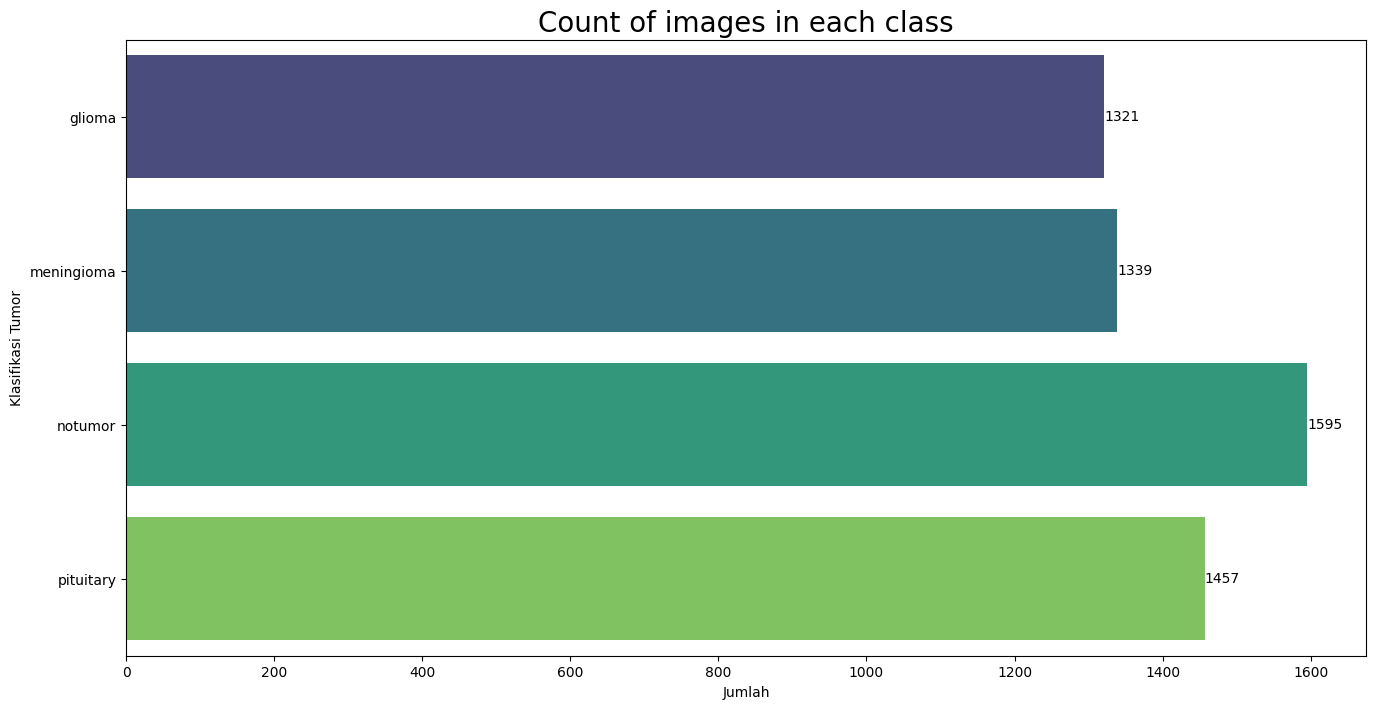

In [7]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=train_dataset, y='Class', palette='viridis')

plt.xlabel('Jumlah')
plt.ylabel('Klasifikasi Tumor')
plt.title('Count of images in each class', fontsize=20)

for container in ax.containers:
   ax.bar_label(container)

plt.show()

C:\Users\raywi\AppData\Local\Temp\ipykernel_3844\1078717581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=test_dataset['Class'], palette='viridis')


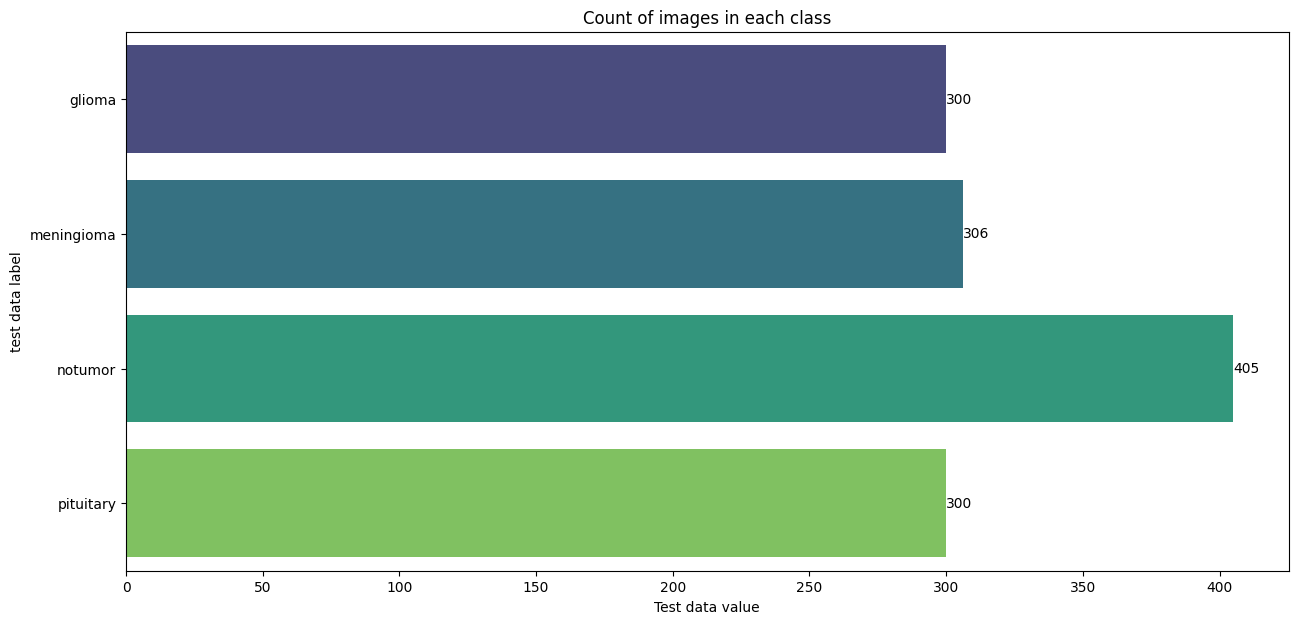

In [8]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=test_dataset['Class'], palette='viridis')

ax.set(xlabel='Test data value', ylabel='test data label', title='Count of images in each class')

for container in ax.containers:
   ax.bar_label(container)

plt.show()

In [9]:
from sklearn.model_selection import train_test_split
validation_dataset, test_dataset = train_test_split(test_dataset, test_size=0.5, random_state=42)

In [10]:
validation_dataset

,Class Path,Class
7,./Testing\glioma\Te-glTr_0007.jpg,glioma
666,./Testing\notumor\Te-no_0060.jpg,notumor
1074,./Testing\pituitary\Te-pi_0063.jpg,pituitary
357,./Testing\meningioma\Te-me_0057.jpg,meningioma
329,./Testing\meningioma\Te-me_0029.jpg,meningioma
...,...,...
1095,./Testing\pituitary\Te-pi_0084.jpg,pituitary
1130,./Testing\pituitary\Te-pi_0119.jpg,pituitary
1294,./Testing\pituitary\Te-pi_0283.jpg,pituitary
860,./Testing\notumor\Te-no_0254.jpg,notumor


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                        brightness_range=(0.8, 1.2))

test_gen = ImageDataGenerator(rescale=1/255)


train_gen = _gen.flow_from_dataframe(train_dataset, x_col='Class Path',
                                 y_col='Class', batch_size=batch_size,
                                 target_size=img_size)

validation_gen = _gen.flow_from_dataframe(validation_dataset, x_col='Class Path',
                                    y_col='Class', batch_size=batch_size,
                                    target_size=img_size)

test_gen = test_gen.flow_from_dataframe(test_dataset, x_col='Class Path',
                                 y_col='Class', batch_size=16,
                                 target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


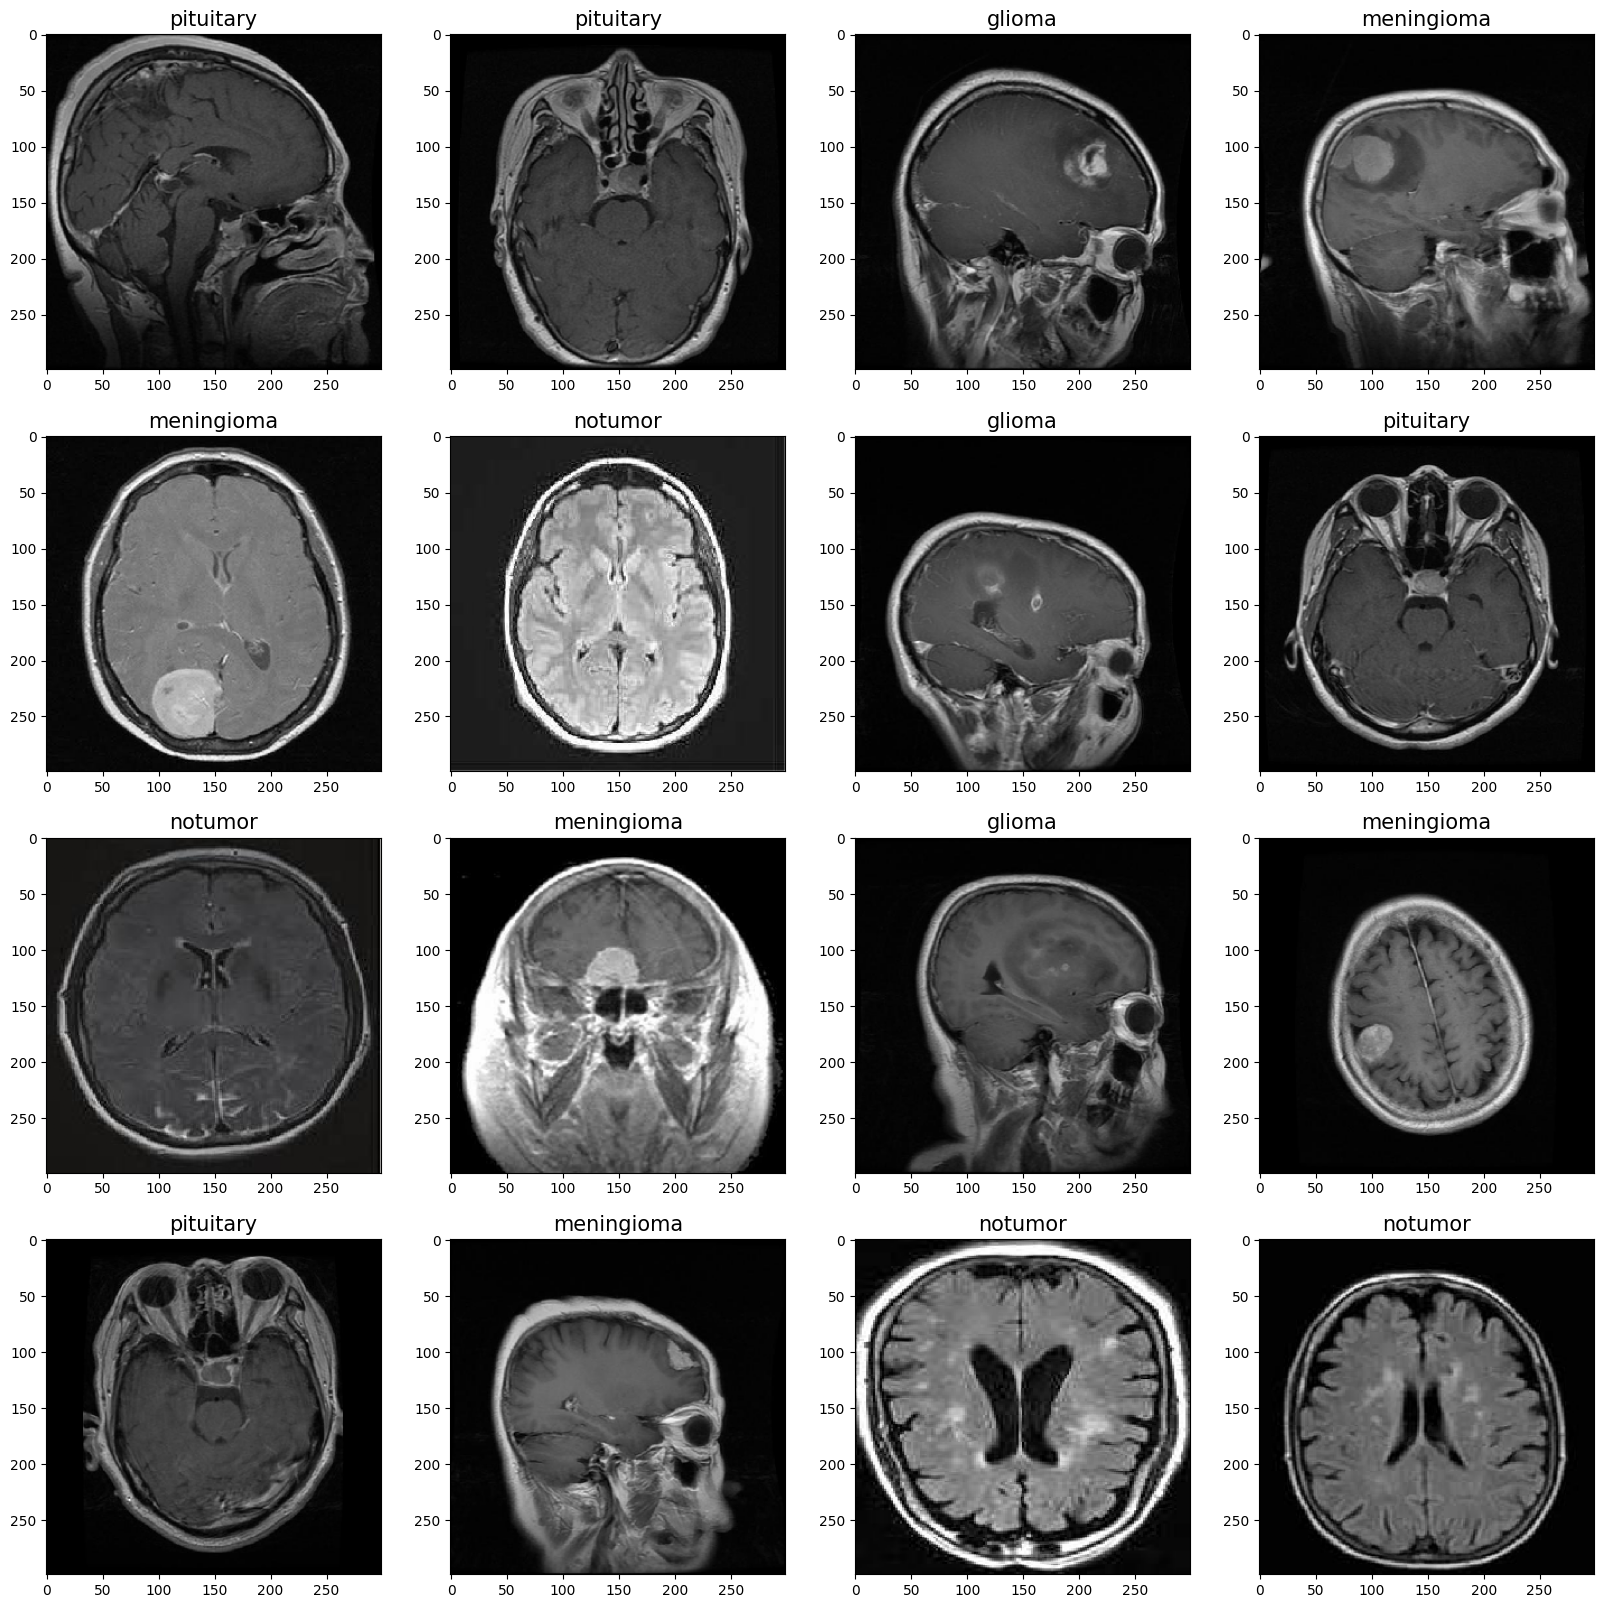

In [12]:
class_dict = train_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(test_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
   plt.subplot(4,4, i + 1)
   plt.imshow(image)
   class_name = classes[np.argmax(label)]
   plt.title(class_name, color='k', fontsize=15)

plt.show()

In [13]:
from tensorflow.keras import models, layers

def build_transfer_model_fine_tune(base_model, input_shape):
   base_model.trainable = False
   model = models.Sequential()
   model.add(base_model)
   model.add(layers.Flatten())
   model.add(layers.Dense(256, activation='relu'))
   model.add(layers.Dropout(0.5))
   model.add(layers.Dense(4, activation='softmax'))
   return model

In [14]:
import tensorflow as tf
def fine_tune_model(model, base_model, fine_tune_at):
   base_model.trainable = True
   for layer in base_model.layers[:fine_tune_at]:
      layer.trainable = False

   model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
   return model

In [15]:
input_shape=(299,299,3)
pretrained_models = {
   "Xception": tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=input_shape, pooling='max'),
   "DenseNet201": tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape, pooling='max'),
   "InceptionV3": tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape, pooling='max'),
   "MobileNetV2": tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape, pooling='max'),
}

C:\Users\raywi\AppData\Local\Temp\ipykernel_3844\3285077077.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV2": tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape, pooling='max'),


In [16]:
model_names = ['Xception', 'DenseNet201', 'InceptionV3', 'MobileNetV2']

for i in model_names:
   base_model = pretrained_models[i]

   print(f"Training {i}...")
   transfer_model = build_transfer_model_fine_tune(base_model, input_shape)

   transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   history = transfer_model.fit(train_gen, epochs=10, validation_data=validation_gen)

   fine_tune_at_layers = {
   "InceptionV3": 249,
   "Xception": 132,
   "DenseNet201": 705,
   "MobileNetV2": 100,
}

   print(f"Fine-tuning {i}...")
   transfer_model = fine_tune_model(transfer_model, base_model, fine_tune_at_layers[i])

   fine_tune_history = transfer_model.fit(train_gen, epochs=10, validation_data=validation_gen)

Training Xception...
Epoch 1/10


c:\conda_folder\envs\AI-Enviroment\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 600s 3s/step - accuracy: 0.6519 - loss: 1.2457 - val_accuracy: 0.8626 - val_loss: 0.3586
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 589s 3s/step - accuracy: 0.8350 - loss: 0.4428 - val_accuracy: 0.8840 - val_loss: 0.3211
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 591s 3s/step - accuracy: 0.8630 - loss: 0.3654 - val_accuracy: 0.9069 - val_loss: 0.2771
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 600s 3s/step - accuracy: 0.8900 - loss: 0.2948 - val_accuracy: 0.8702 - val_loss: 0.3464
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 589s 3s/step - accuracy: 0.8802 - loss: 0.3144 - val_accuracy: 0.8977 - val_loss: 0.2411
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 588s 3s/step - accuracy: 0.8963 - loss: 0.2854 - val_accuracy: 0.9053 - val_loss: 0.2319
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 588s 3s/step - accuracy: 0.8910 - loss: 0.2900 - val_accuracy: 0.9084 - val_loss: 0.2406
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 589s 3s/step - accuracy: 0.8893 - loss: 0.2817 - val_accuracy: 0.923

In [18]:
for i in model_names:
   test_loss, test_accuracy = transfer_model.evaluate(test_gen)
   print(f"Test accuracy for {i}: {test_accuracy, test_loss}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 383ms/step - accuracy: 0.8930 - loss: 0.1285
Test accuracy for Xception: (0.8993902206420898, 0.13148297369480133)
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 378ms/step - accuracy: 0.8930 - loss: 0.1285
Test accuracy for DenseNet201: (0.8993902206420898, 0.13148297369480133)
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 375ms/step - accuracy: 0.8930 - loss: 0.1285
Test accuracy for InceptionV3: (0.8993902206420898, 0.13148297369480133)
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 380ms/step - accuracy: 0.8930 - loss: 0.1285
Test accuracy for MobileNetV2: (0.8993902206420898, 0.13148297369480133)


In [17]:
train_score = transfer_model.evaluate(train_gen, verbose=1)
valid_score = transfer_model.evaluate(validation_gen, verbose=1)
test_score = transfer_model.evaluate(test_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 138s 767ms/step - accuracy: 0.9548 - loss: 0.0844
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 737ms/step - accuracy: 0.9156 - loss: 0.1100


c:\conda_folder\envs\AI-Enviroment\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 431ms/step - accuracy: 0.8930 - loss: 0.1285
Train Loss: 0.0833
Train Accuracy: 95.40%
--------------------
Validation Loss: 0.1202
Validation Accuracy: 90.69%
--------------------
Test Loss: 0.1315
Test Accuracy: 89.94%
